# Table of Contents
### 1. Import Librairies
### 2. Import Data
### 3. Explore Relationships between Variables
##### Correlations
##### Scatterplots
##### Pair Plot
##### Categorical Plot
### 4. Questions and Hypotheses

# 1. Import Librairies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

# 2. Import Data

In [3]:
#Create path
path = r'C:\Users\manev\Documents\Agentür für Arbeit\CareerFoundry\Data Immersion\Achievement 6\Film_Industry'

In [4]:
#Create data frame for the "movie_data_cleaned_35yr" data set
movie_data= pd.read_pickle(os.path.join(path,'Data','Prepared Data','movie_data_cleaned_35yr.pkl'))

In [5]:
#Checking the shape of the data set
movie_data.shape

(7000, 13)

In [6]:
#Checking the headers of the data set
movie_data.head()

,movie_name,MPAA_rating,genre,release_year,grade,nb_of_votes,director,writer,main_star,production_country,gross_revenue,production_company,runtime
641,Weird Science,PG-13,Comedy,1985,6.6,83000,John Hughes,John Hughes,Anthony Michael Hall,United States,38934048.0,Universal Pictures,94
642,The Goonies,PG,Adventure,1985,7.8,252000,Richard Donner,Chris Columbus,Sean Astin,United States,63980721.0,Warner Bros.,114
643,Back to the Future,PG,Adventure,1985,8.5,1100000,Robert Zemeckis,Robert Zemeckis,Michael J. Fox,United States,381906762.0,Universal Pictures,116
644,To Live and Die in L.A.,R,Action,1985,7.3,31000,William Friedkin,Gerald Petievich,William Petersen,United States,17307019.0,SLM Production Group,116
645,Clue,PG,Comedy,1985,7.3,88000,Jonathan Lynn,John Landis,Eileen Brennan,United States,14643997.0,Paramount Pictures,94


In [7]:
#Check the data type for each variable
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7000 entries, 641 to 7640
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_name          7000 non-null   object 
 1   MPAA_rating         7000 non-null   object 
 2   genre               7000 non-null   object 
 3   release_year        7000 non-null   int64  
 4   grade               7000 non-null   float64
 5   nb_of_votes         7000 non-null   int64  
 6   director            7000 non-null   object 
 7   writer              7000 non-null   object 
 8   main_star           7000 non-null   object 
 9   production_country  7000 non-null   object 
 10  gross_revenue       7000 non-null   float64
 11  production_company  7000 non-null   object 
 12  runtime             7000 non-null   int64  
dtypes: float64(2), int64(3), object(8)
memory usage: 765.6+ KB


# 3. Explore Relationships between Variables

### Correlations

In [8]:
# Create a subset containing only the numerical variables
movie_data_num= movie_data[['grade', 'nb_of_votes', 'gross_revenue', 'runtime']]

In [9]:
# Create a correlation matrix using pandas
movie_data_num.corr()

,grade,nb_of_votes,gross_revenue,runtime
grade,1.000000,0.410732,0.181581,0.401638
nb_of_votes,0.410732,1.000000,0.629215,0.312468
gross_revenue,0.181581,0.629215,1.000000,0.246706
runtime,0.401638,0.312468,0.246706,1.000000


In [10]:
#look for the current directory where the visualizations are being saved
cwd = os.getcwd()
cwd

'C:\\Users\\manev\\Documents\\Agentür für Arbeit\\CareerFoundry\\Data Immersion\\Achievement 6\\Film_Industry\\Scripts'

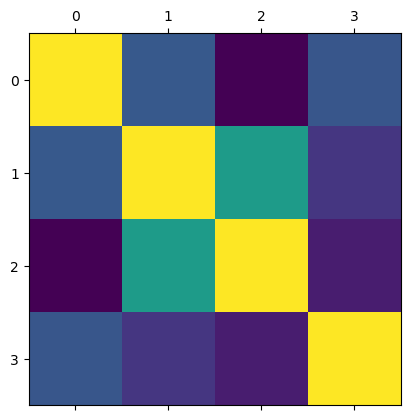

In [11]:
# Create a correlation heatmap using matplotlib
plt.matshow(movie_data_num.corr())

Text(0.5, 1.0, 'Correlation Matrix')

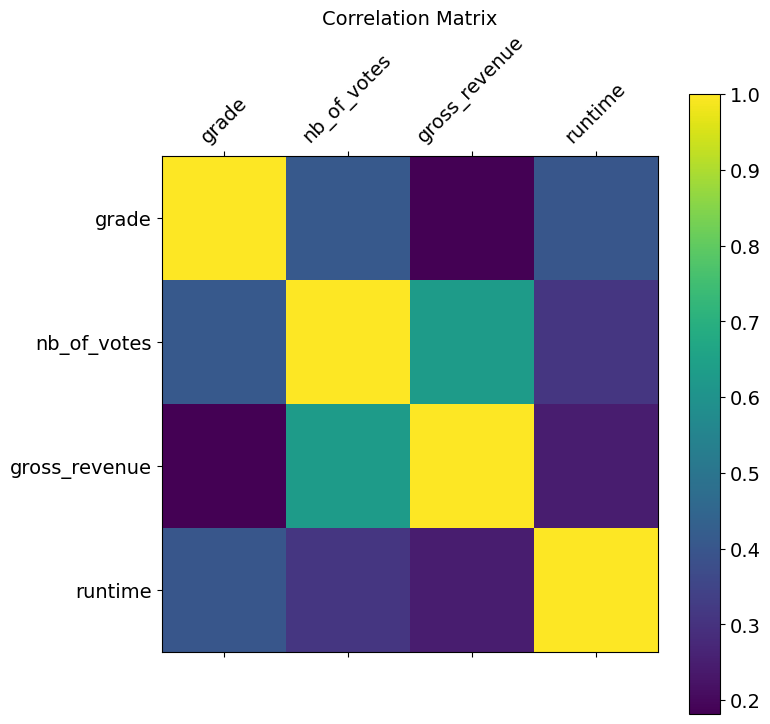

In [12]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(movie_data_num.corr(), fignum=f.number) # type of plot
plt.xticks(range(movie_data_num.shape[1]), movie_data_num.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(movie_data_num.shape[1]), movie_data_num.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

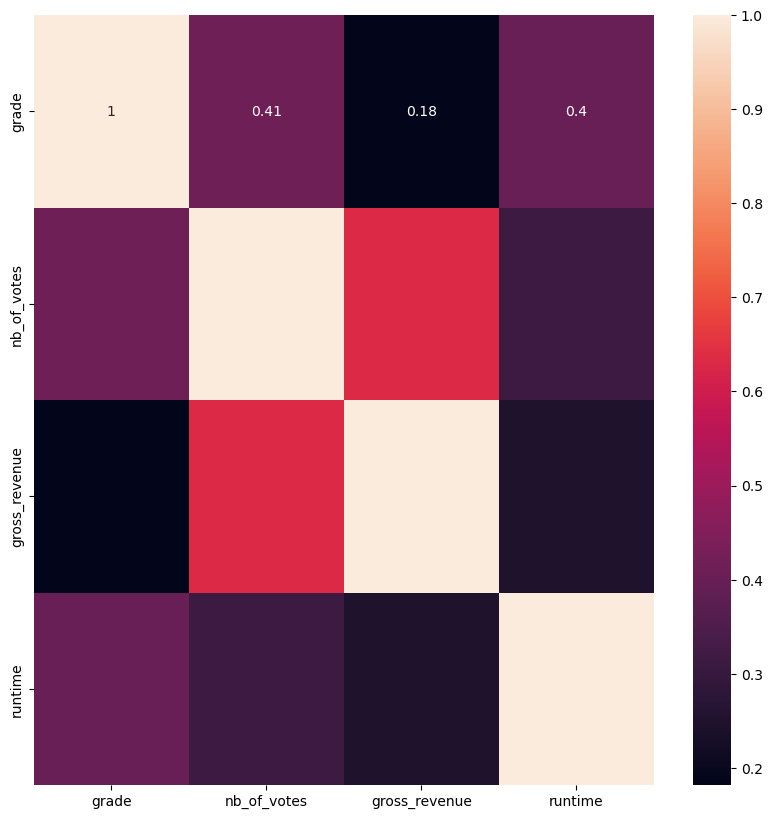

In [13]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))
# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(movie_data_num.corr(), annot = True, annot_kws={"size": 10}, ax = ax) 

The correlation coefficients were only shown on the first line, so I will create a correlation matrix and create a loop to have annotations on every line of the heatmap.

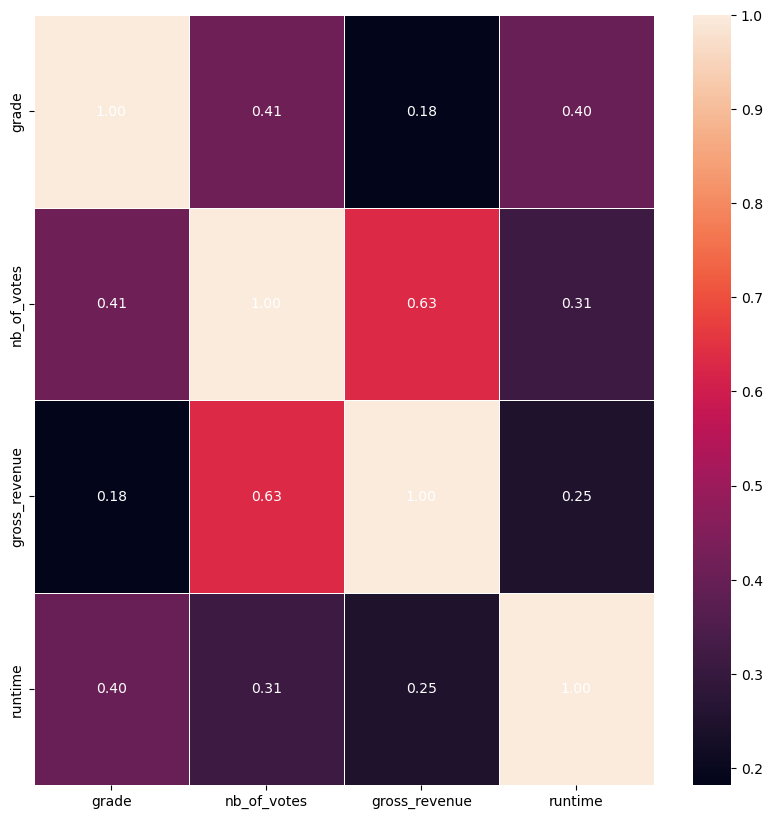

In [14]:
# Create a subplot with matplotlib
f, ax = plt.subplots(figsize=(10, 10))
# Create a correlation heatmap with annotations for each cell
corr_matrix = movie_data_num.corr()
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        text = "{:.2f}".format(corr_matrix.iloc[i, j])
        ax.text(j + 0.5, i + 0.5, text, ha='center', va='center', fontsize=10,color='white')
# Define the heatmap appearance
sns.heatmap(corr_matrix, annot=False, linewidths=.5, ax=ax)
#Save the heatmap
plt.savefig("heatmap.png") 

We found one correlation coefficient indicating a strong relationship between two variables:
gross_revenue and nb_of_votes : 0,63

We see several correlation coefficients indicating a moderate relationship between variables :
* nb_of_votes and grade: 0,41
* runtime and grade: 0,40
* nb of votes and runtime: 0,31

We found two correlation coefficients indicating a weak relationship between two variables:
* gross_revenue and runtime: 0,25
* gross_revenue and grade : 0,18

##### We will explore three of these relationships further by creating scatterplots in order to assess whether relationships between these variables have a linear or non-linear trend.
* gross_revenue and nb_of_votes : 0,63
* nb_of_votes and grade: 0,41

### Scatterplots

Create scatterplots for the variables with the strongest relationships

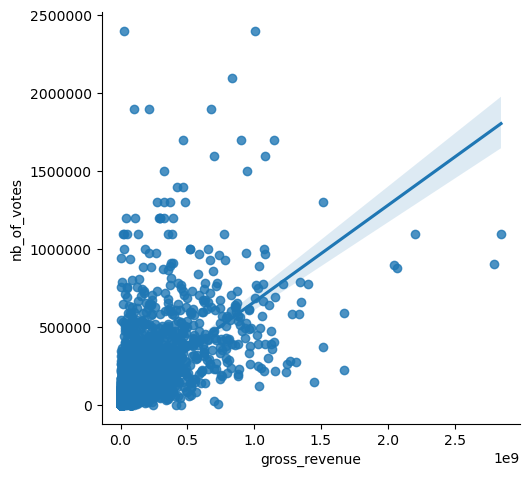

In [15]:
# Create a scatterplot for the "gross_revenue" and "nb_of_votes" columns 
sns.lmplot(x = 'gross_revenue', y = 'nb_of_votes', data = movie_data_num)
# Set the format of the y axis to non-scientific notation
plt.ticklabel_format(style='plain', axis='y')
#Save the scatterplot
plt.savefig("scatterplot.png") 

Although these two variables have the higest correlation coefficient, and therefore the strongst relationship, the relationship between them isn't linear.

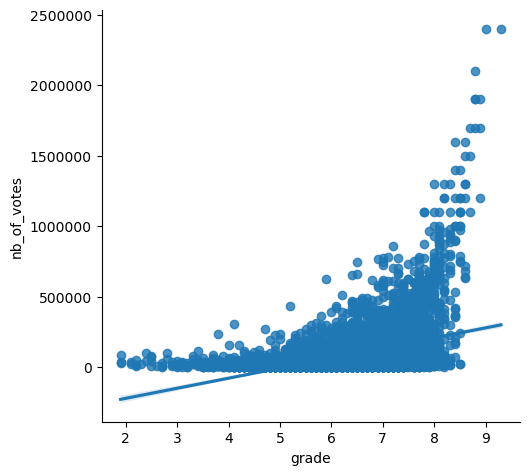

In [16]:
# Create a scatterplot for the "grade" and "nb_of_votes" columns in seaborn
sns.lmplot(x = 'grade', y = 'nb_of_votes', data = movie_data_num)
# Set the axis format to non-scientific notation
plt.ticklabel_format(style='plain', axis='both')
#Save the scatterplot
plt.savefig("scatterplot2.png") 

The relationship between these two variables, albeit positive, isn't linear. The distribution of the data points look like a curve.

### Pair Plot

In [17]:
# Create a subset for the pair plots
sub_movie_data_num = movie_data_num[['gross_revenue', 'nb_of_votes', 'grade', 'runtime']]

C:\Users\manev\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\manev\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\manev\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\manev\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

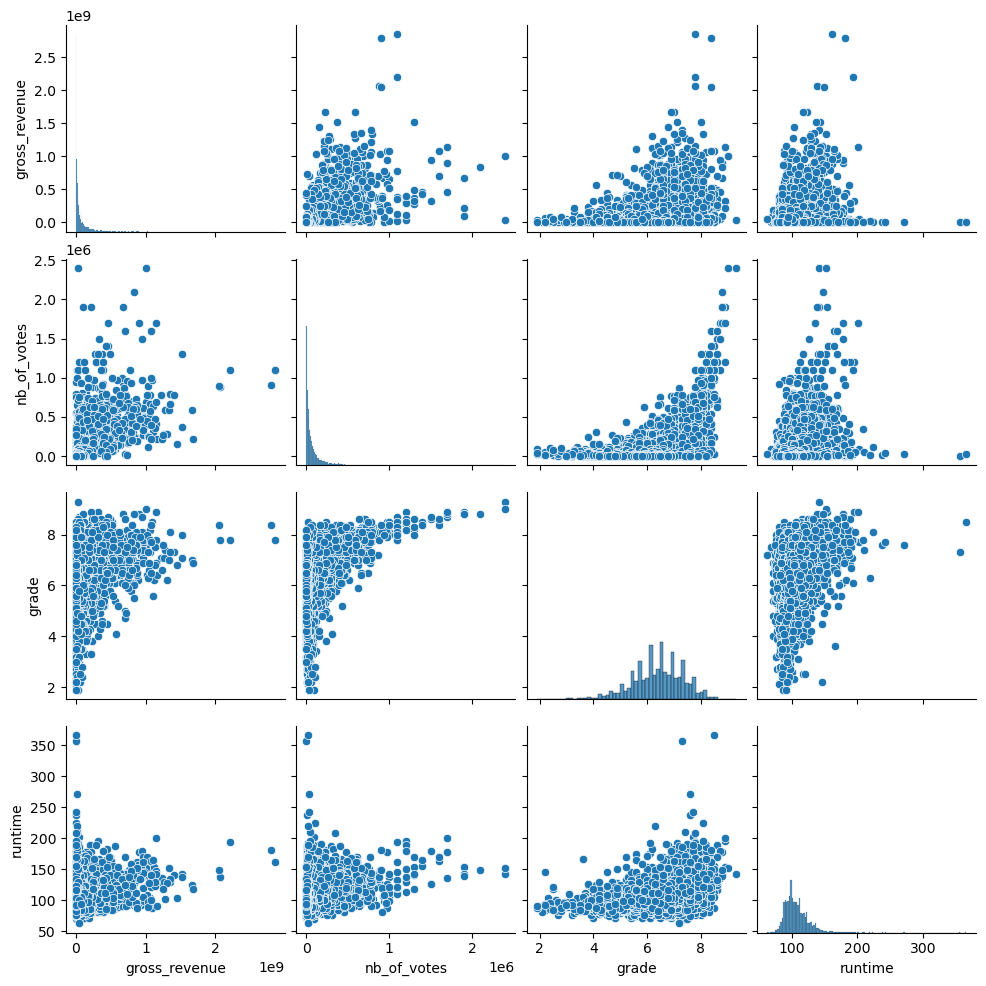

In [18]:
#Create a pair plot
g = sns.pairplot(sub_movie_data_num)
#Save the pairplot
plt.savefig("pairplot.png") 

The "nb_of_votes" and "grade" variables seem to have the closest relationship. 

The "gross_revenue" and "grade" variables also seem to have an interesting relationship.

### Categorical Plot

C:\Users\manev\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(0.0, 3000000.0)

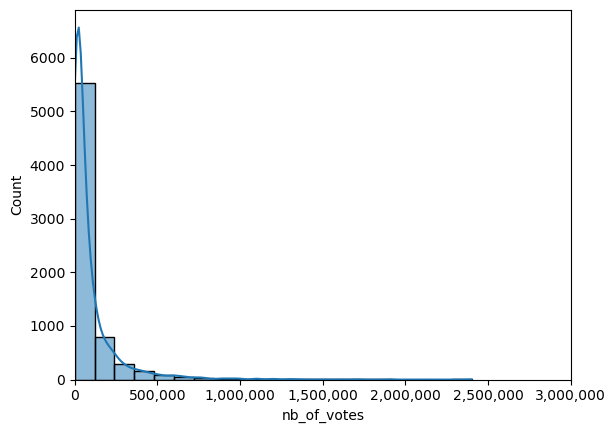

In [19]:
#Observe the distribution of the nb_of_votes variable to create categories.
sns.histplot(movie_data['nb_of_votes'], bins=20, kde=True)

# Set the x-axis ticks without scientific notation
plt.xticks(ticks=plt.xticks()[0], labels=[f'{int(x):,}' for x in plt.xticks()[0]])
# Set the x-axis limits to start from 0
plt.xlim(0)

This isn't very helpful, as the outliers are making this histogram very right skewed. I will calculate the deciles of the variable instead, to help me create 3 categories : Low, Medium and High voting rates.

In [20]:
nb_of_votes = movie_data['nb_of_votes']

# Calculate deciles using numpy.percentile
deciles = np.percentile(nb_of_votes, np.arange(10, 100, 10))

# Print the deciles
for i, decile in enumerate(deciles, start=1):
    print(f'Decile {i}: {decile:.2f}')

Decile 1: 3700.00
Decile 2: 8100.00
Decile 3: 15000.00
Decile 4: 24000.00
Decile 5: 37000.00
Decile 6: 53000.00
Decile 7: 81000.00
Decile 8: 127000.00
Decile 9: 235000.00


In [21]:
#Creating the 3 categories in a new column called "viewers_engagement".

In [22]:
movie_data.loc[movie_data['nb_of_votes'] < 3700, 'viewers_engagement'] = 'Low voting rate'

In [23]:
movie_data.loc[(movie_data['nb_of_votes'] >= 3700) & (movie_data['nb_of_votes'] < 235000), 'viewers_engagement'] = 'Medium voting rate'

In [24]:
movie_data.loc[movie_data['nb_of_votes'] >= 235000, 'viewers_engagement'] = 'High voting rate'

In [25]:
#check the value count of each category created in the new "viewers_engagement' column
movie_data['viewers_engagement'].value_counts()

viewers_engagement
Medium voting rate    5615
High voting rate       706
Low voting rate        679
Name: count, dtype: int64

C:\Users\manev\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\manev\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


ValueError: The number of FixedLocator locations (10), usually from a call to set_ticks, does not match the number of labels (72).

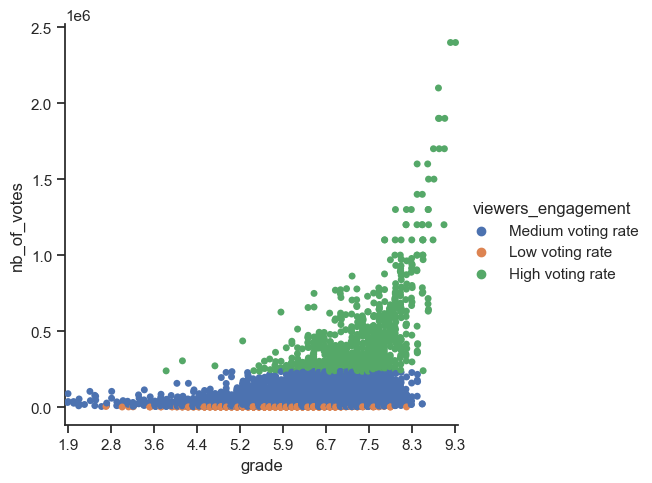

In [26]:
# Create a categorical plot
sns.set(style="ticks")
g = sns.catplot(x="grade", y="nb_of_votes", hue="viewers_engagement", data=movie_data)
# Set the x-axis ticks to show only 11 ticks
plt.xticks(np.linspace(0, len(movie_data['grade'].unique()) - 1, 10), movie_data['grade'].unique())
#Save the categorical plot
plt.savefig("categorical plot.png") 

We can see that it is very rare for a movie with a high voting rate to be given a grade below 5,2. There are three exceptions to this (3,8; 4,1 and 4,7), but no movie with a high voting rate has been given a grade below 3,8.

# 4. Questions and hypotheses

##### This exploratory analysis allowed us to give some answers to several questions we have asked ourselves when defining the project. They are a follow:

* What makes IMDb users engage with a movie? The engagement measure here would be the number of votes.
  
Movies that generate the most engagement tend to get high grades.

Movies that generate the most engagement did not necessarily generate high gross revenue.

Movies that generate the most engagement tend to have a runtime of between 100 and 200 minutes.

* Does the runtime have an impact on the grades given to movies?
  
The runtime has a moderate relationship to the grades given to the movies.
* 	Does the runtime have an impact on the number of votes a movie collected

The runtime has a moderate, bordering on weak relationship to the number of votes a movies collect.


##### Additional questions that could be interesting to think about, after this exploratory analysis:
* Does the gross revenue of a movie impacts its grade?
* What is the relationship between the "gross_revenue" and "grade" variables?
* Do movies with a high voting rate share specific attributes?

##### Define some hypotheses:
* If a movie has a high gross revenue, it will have a high grade.
* If a movie has a high grade, its viewers engagement (number of votes) will be high.